In [3]:
import torch
import torch.utils.data as Data
import torch.nn.functional as F
from torch.autograd import Variable
import matplotlib.pyplot as plt

## Hyper parameters

In [4]:
LR = 0.01
BATCH_SIZE = 32
EPOCH = 24

## Fake data

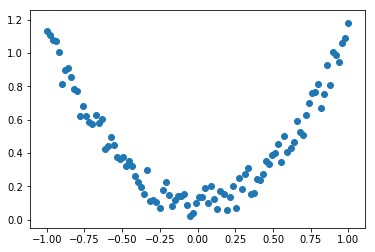

In [6]:
x = torch.unsqueeze(torch.linspace(-1,1,100),dim=1) # transfrom 1d data to 2d
y = x.pow(2) + 0.2*torch.rand(x.size())
plt.scatter(x.data.numpy(),y.data.numpy())

In [7]:
torch_dataset = Data.TensorDataset(x,y)
loader = Data.DataLoader(
    dataset=torch_dataset,
    batch_size=BATCH_SIZE,
    shuffle=True,
    num_workers=2
)

In [10]:
class Net(torch.nn.Module):
    def __init__(self):
        super(Net,self).__init__()
        self.hidden = torch.nn.Linear(1,20)
        self.predict = torch.nn.Linear(20, 1)
    
    def forward(self,x):
        x = torch.relu(self.hidden(x))
        x = self.predict(x)
        return x

## Different Nets

In [11]:
net_SGD = Net()
net_Momentum = Net()
net_RMSProp = Net()
net_Adam = Net()
nets = [net_SGD,net_Momentum,net_RMSProp,net_Adam]

In [13]:
opt_SGD = torch.optim.SGD(net_SGD.parameters(),lr=LR)
opt_Momentum = torch.optim.SGD(net_Momentum.parameters(),lr=LR,momentum=0.8)
opt_RMSProp = torch.optim.RMSprop(net_RMSProp.parameters(),lr=LR,alpha=0.9)
opt_Adam = torch.optim.Adam(net_Adam.parameters(),lr=LR,betas=(0.9,0.99))
optimizers = [opt_SGD,opt_Momentum,opt_RMSProp,opt_Adam]

In [14]:
loss_func = torch.nn.MSELoss()
loss_his = [[],[],[],[]]
for epoch in range(EPOCH):
    print(epoch)
    for step,(batch_x,batch_y) in enumerate(loader):
        b_x = Variable(batch_x)
        b_y = Variable(batch_y)
        
        for net,opt ,l_his in zip(nets,optimizers,loss_his):
            output = net(b_x)
            loss = loss_func(output,b_y)
            opt.zero_grad()
            loss.backward()
            opt.step()
            l_his.append(loss.item())

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23


Text(0, 0.5, 'Loss')

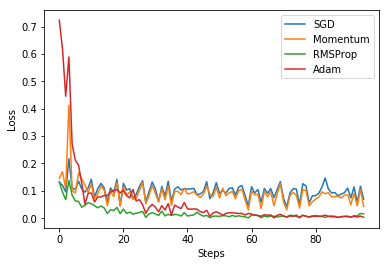

In [15]:
labels = ['SGD','Momentum','RMSProp','Adam']
for i,l_his in enumerate(loss_his):
    plt.plot(l_his,label=labels[i])
plt.legend(loc='best')
plt.xlabel('Steps')
plt.ylabel('Loss')

(0, 0.2)

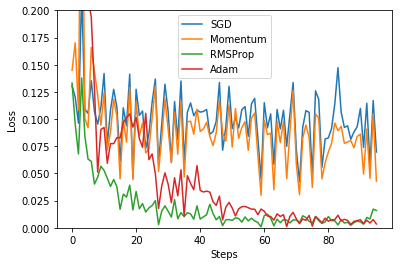

In [17]:
labels = ['SGD','Momentum','RMSProp','Adam']
for i,l_his in enumerate(loss_his):
    plt.plot(l_his,label=labels[i])
plt.legend(loc='best')
plt.xlabel('Steps')
plt.ylabel('Loss')
plt.ylim((0,0.2))